# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [50]:
df = pd.read_csv('Dataset_Inisiasi.csv')
df_original = pd.read_csv('Dataset_Inisiasi.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [52]:
df.shape

(2512, 16)

In [53]:
# cek jenis data
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
nonNumerical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_cols)

print("\nNon Numerical Columns:")
print(nonNumerical_cols)

Numerical Columns:
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

Non Numerical Columns:
Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')


In [54]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

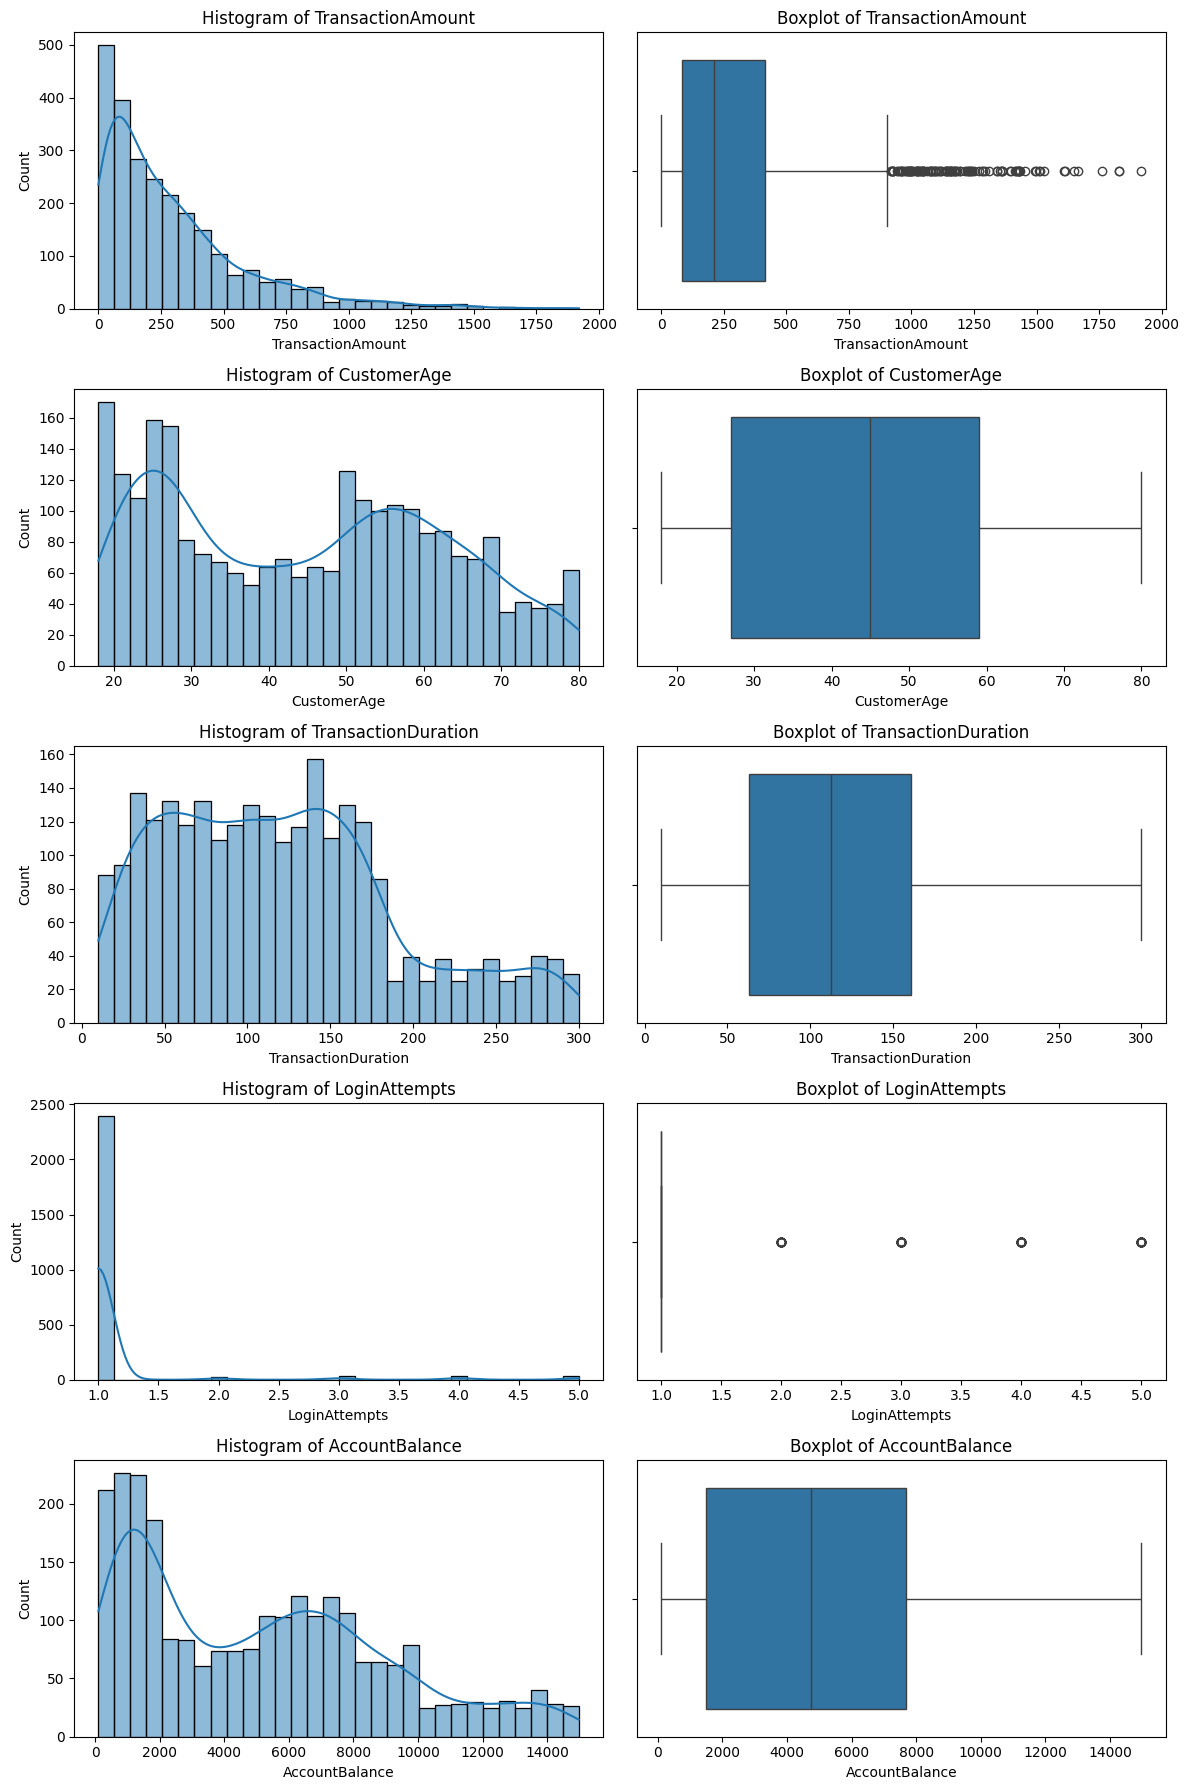

In [55]:
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

fig, axes = plt.subplots(len(numeric_features), 2, figsize=(12, 18))

for i, col in enumerate(numeric_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[i, 1], orient='h')
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

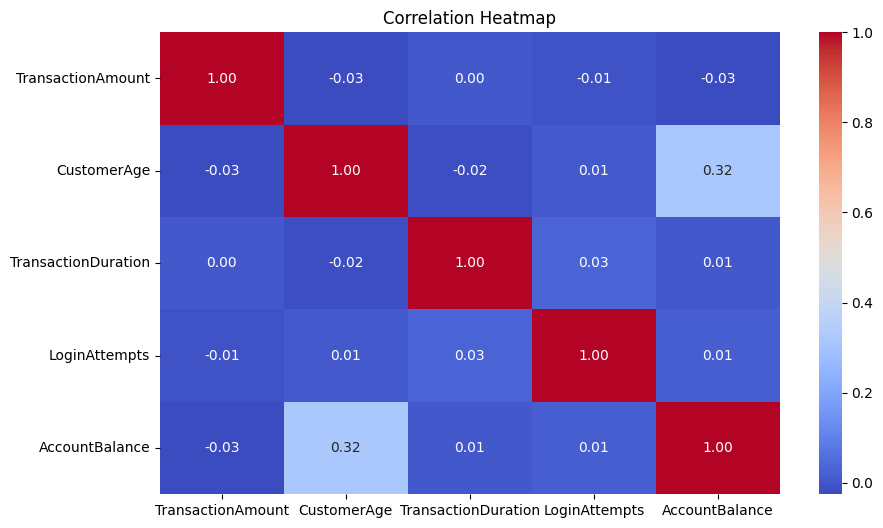

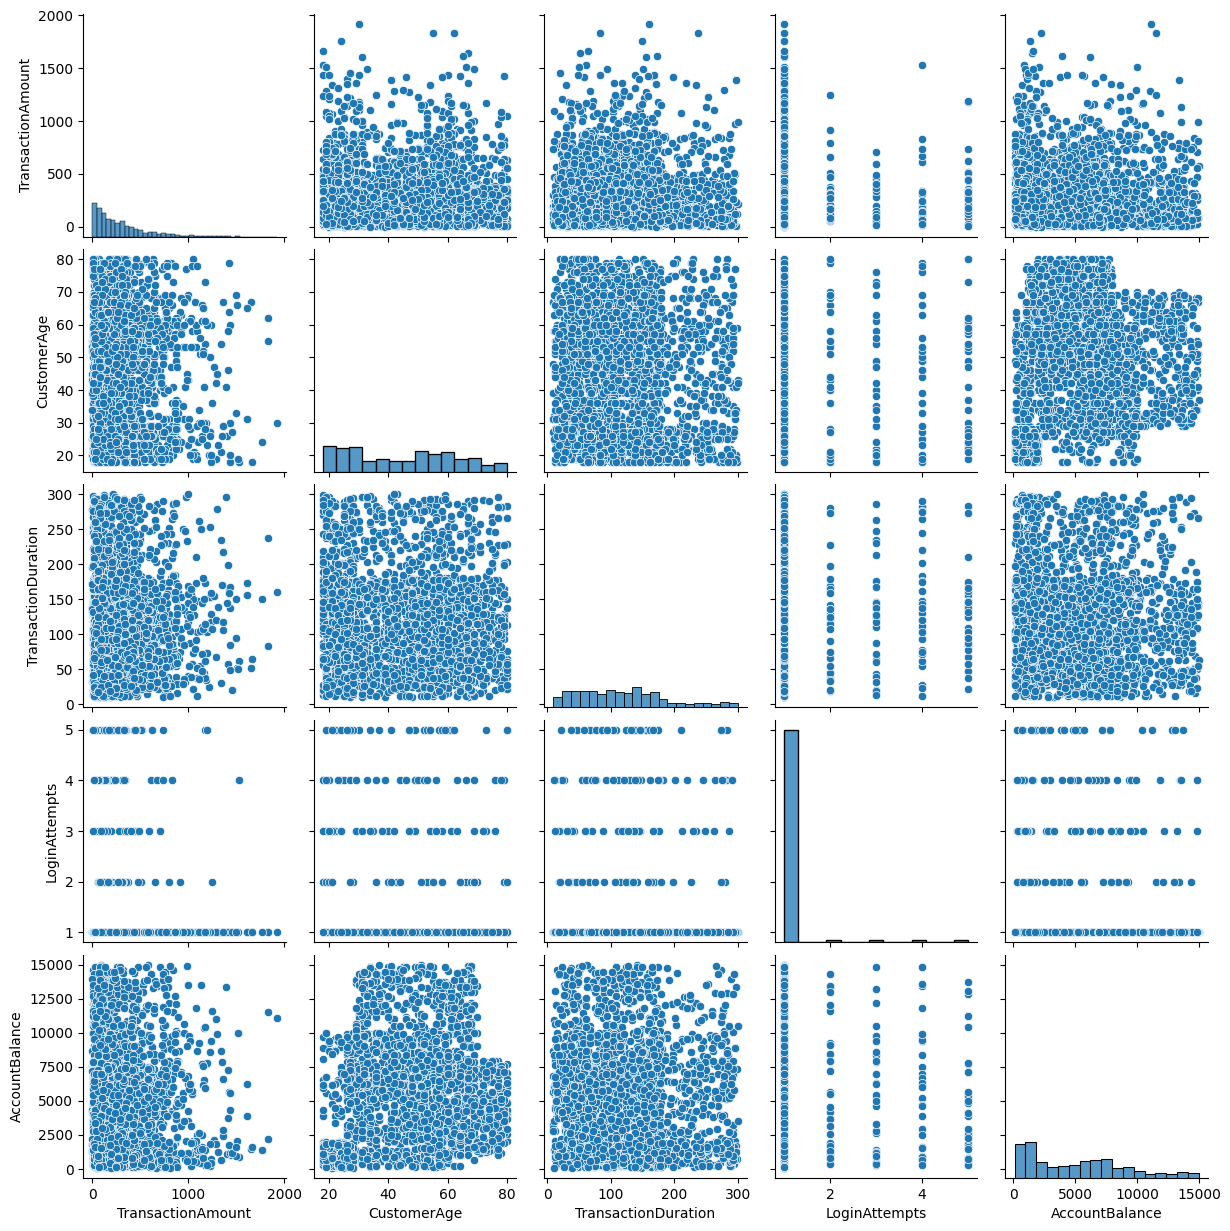

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[numeric_features])
plt.show()

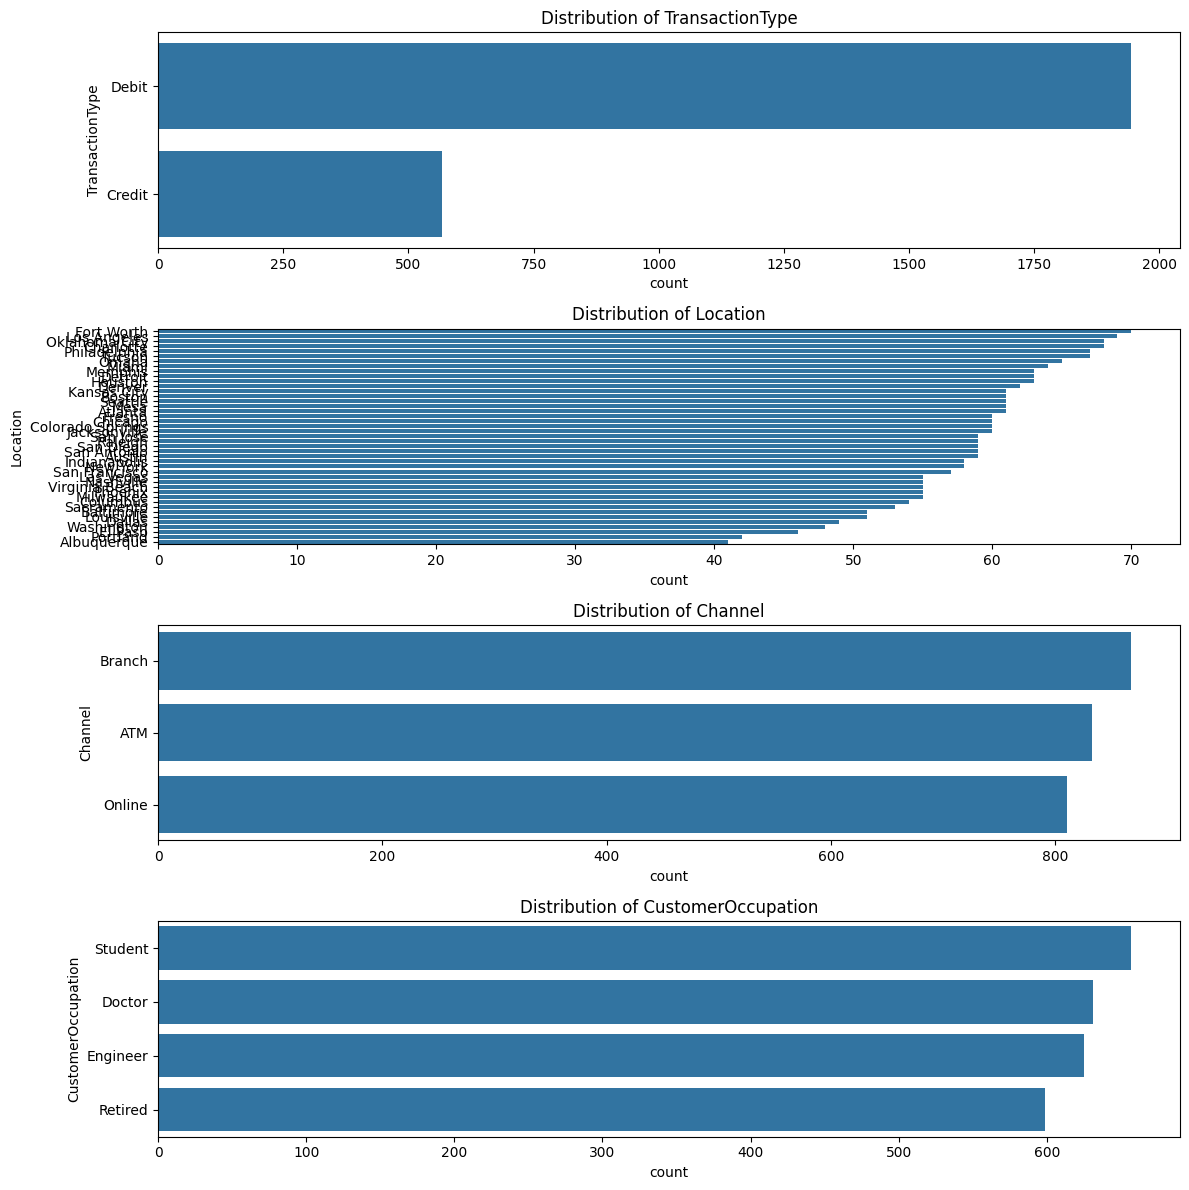

In [57]:
# Variabel kategorikal
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 12))

for i, col in enumerate(categorical_features):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insight**
- Struktur Data
    - Pada struktur data diatas dataframe memiliki 2512 baris dan 16 kolom
    - Dataframe diatas memiliki 5 kolom numerical dan 11 kolom yang bukan kolomnumerical
- Missing Value
    - Pada dataframe diatas tidak memiliki missing value sama sekali pada setiap kolom
- Analisis Distribusi Korelasi dan Visualisasi Data
    - Pada distribusi data dari di dataframe diatas sebenarnya sudah cukup baik, namun masih ada yang harus diperhatikan disini khususnya pada data numerical pada kolom transaction amount dan login attempt. Pada data tersebut memiliki outlier yang cukup banyak. Sehingga kita harus menanganinya nanti
    - Pada visualisasi tersebut data cukup tersebar dengan merata pada kategorinya juga memiliki distribusi yang beragam 

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [58]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
# Penanganan outlier untuk TransactionAmount menggunakan IQR
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Batasi nilai TransactionAmount dalam rentang IQR
df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper_bound, upper_bound, df['TransactionAmount'])
df['TransactionAmount'] = np.where(df['TransactionAmount'] < lower_bound, lower_bound, df['TransactionAmount'])

# Penanganan outlier untuk LoginAttempts menggunakan Winsorizing (batas 95%)
df['LoginAttempts'] = mstats.winsorize(df['LoginAttempts'], limits=[0.05, 0.05])

# Cek hasil setelah penanganan outlier
df[numeric_features].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.0,2512.000000
mean,284.847250,44.673965,119.643312,1.0,5114.302966
std,252.067285,17.792198,69.963757,0.0,3900.942499
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,81.885000,27.000000,63.000000,1.0,1504.370000
50%,211.140000,45.000000,112.500000,1.0,4735.510000
75%,414.527500,59.000000,161.000000,1.0,7678.820000
max,913.491250,80.000000,300.000000,1.0,14977.990000


In [61]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [62]:
# normalisasi data numerik
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [63]:
df[numeric_features].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.0,2512.000000
mean,0.311627,0.430225,0.378080,0.0,0.336973
std,0.276017,0.286971,0.241254,0.0,0.262218
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.089380,0.145161,0.182759,0.0,0.094316
50%,0.230916,0.435484,0.353448,0.0,0.311510
75%,0.453628,0.661290,0.520690,0.0,0.509357
max,1.000000,1.000000,1.000000,0.0,1.000000


In [64]:
# Encoding fitur kategorikal
# TransactionType (Label Encoding karena hanya 2 kategori)
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])

# One-Hot Encoding untuk fitur lain jika jumlah kategori sedikit
df = pd.get_dummies(df, columns=['Channel', 'CustomerOccupation'])

In [65]:
df[numeric_features].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.0,2512.000000
mean,0.311627,0.430225,0.378080,0.0,0.336973
std,0.276017,0.286971,0.241254,0.0,0.262218
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.089380,0.145161,0.182759,0.0,0.094316
50%,0.230916,0.435484,0.353448,0.0,0.311510
75%,0.453628,0.661290,0.520690,0.0,0.509357
max,1.000000,1.000000,1.000000,0.0,1.000000


In [66]:
# Binning TransactionAmount (rendah, sedang, tinggi)
df['TransactionAmount_Bin'] = pd.cut(df['TransactionAmount'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Binning CustomerAge (muda, dewasa, senior)
df['CustomerAge_Bin'] = pd.cut(df['CustomerAge'], bins=[0, 0.33, 0.66, 1], labels=['Young', 'Adult', 'Senior'])

# Binning TransactionDuration (cepat, sedang, lama)
df['TransactionDuration_Bin'] = pd.cut(df['TransactionDuration'], bins=[0, 0.33, 0.66, 1], labels=['Fast', 'Medium', 'Slow'])

# Menampilkan distribusi hasil binning
df[['TransactionAmount_Bin', 'CustomerAge_Bin', 'TransactionDuration_Bin']].describe(include='all')

,TransactionAmount_Bin,CustomerAge_Bin,TransactionDuration_Bin
count,2511,2456,2506
unique,3,3,3
top,Low,Young,Fast
freq,1573,992,1162


In [67]:
df.describe()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.0,2512.000000
mean,0.311627,0.773885,0.430225,0.378080,0.0,0.336973
std,0.276017,0.418398,0.286971,0.241254,0.0,0.262218
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.089380,1.000000,0.145161,0.182759,0.0,0.094316
50%,0.230916,1.000000,0.435484,0.353448,0.0,0.311510
75%,0.453628,1.000000,0.661290,0.520690,0.0,0.509357
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [68]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,TransactionAmount_Bin,CustomerAge_Bin,TransactionDuration_Bin
0,TX000001,AC00128,0.015144,2023-04-11 16:29:14,1,San Diego,D000380,162.198.218.92,M015,0.838710,...,True,False,False,True,False,False,False,Low,Senior,Fast
1,TX000002,AC00455,0.411703,2023-06-27 16:44:19,1,Houston,D000051,13.149.61.4,M052,0.806452,...,True,False,False,True,False,False,False,Medium,Senior,Medium
2,TX000003,AC00019,0.138004,2023-07-10 18:16:08,1,Mesa,D000235,215.97.143.157,M009,0.016129,...,False,False,True,False,False,False,True,Low,Young,Fast
3,TX000004,AC00070,0.201745,2023-05-05 16:32:11,1,Raleigh,D000187,200.13.225.150,M002,0.129032,...,False,False,True,False,False,False,True,Low,Young,Fast
4,TX000005,AC00411,0.014443,2023-10-16 17:51:24,0,Atlanta,D000308,65.164.3.100,M091,0.129032,...,False,False,True,False,False,False,True,Low,Young,Medium


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TransactionID                2512 non-null   object  
 1   AccountID                    2512 non-null   object  
 2   TransactionAmount            2512 non-null   float64 
 3   TransactionDate              2512 non-null   object  
 4   TransactionType              2512 non-null   int64   
 5   Location                     2512 non-null   object  
 6   DeviceID                     2512 non-null   object  
 7   IP Address                   2512 non-null   object  
 8   MerchantID                   2512 non-null   object  
 9   CustomerAge                  2512 non-null   float64 
 10  TransactionDuration          2512 non-null   float64 
 11  LoginAttempts                2512 non-null   float64 
 12  AccountBalance               2512 non-null   float64 
 13  Pre

In [70]:
# Salin dataframe
df_cluster = df.copy()

# Hapus kolom yang tidak relevan
cols_to_drop = [
    'TransactionID', 'AccountID', 'TransactionDate', 'Location', 
    'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'
]
df_cluster.drop(columns=cols_to_drop, inplace=True)

# Pastikan kolom yang tersisa
print(df_cluster.columns)

Index(['TransactionAmount', 'TransactionType', 'CustomerAge',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Channel_ATM',
       'Channel_Branch', 'Channel_Online', 'CustomerOccupation_Doctor',
       'CustomerOccupation_Engineer', 'CustomerOccupation_Retired',
       'CustomerOccupation_Student', 'TransactionAmount_Bin',
       'CustomerAge_Bin', 'TransactionDuration_Bin'],
      dtype='object')


In [71]:
# Encoding fitur binning (ubah kategori menjadi numerik)
binning_cols = ['TransactionAmount_Bin', 'CustomerAge_Bin', 'TransactionDuration_Bin']
label_encoders = {}
for col in binning_cols:
    if col in df_cluster.columns: 
        df_cluster[col] = df_cluster[col].astype(str) 
        le = LabelEncoder()
        df_cluster[col] = le.fit_transform(df_cluster[col])
        label_encoders[col] = le

df_cluster.fillna(df_cluster.mean(), inplace=True)

**Insight**
- `Transaction Amount` Mayoritas transaksi di bawah 500, tetapi ada beberapa transaksi yang mencapai 2000+. Ini menunjukkan bahwa sebagian besar pengguna melakukan transaksi kecil, sementara ada beberapa yang mungkin merupakan transaksi besar yang tidak umum. `Login Attempts` Sebagian besar pengguna hanya melakukan 1 kali login, tetapi ada beberapa yang memiliki jumlah login yang jauh lebih tinggi. Ini bisa menjadi indikasi adanya aktivitas tidak biasa seperti percobaan login berulang (fraud) atau pengguna yang sering gagal login.
- Pada tahap preprosessing tidak ditemukan nilai kosong yang signifikan, sehingga semua fitur dapat digunakan dalam model tanpa perlu imputasi tambahan.
- `Customer Age`, `Transaction Duration`, `Account Balance`. Semua fitur numerik distandarisasi menggunakan MinMaxScaler, memastikan skala yang seragam sebelum diterapkan pada model clustering. `Customer Occupation` Dikodekan ke dalam one-hot encoding, sehingga model dapat memahami hubungan antara jenis pekerjaan dengan pola transaksi. 

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [72]:
n_clusters = 3

# Melatih model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_cluster)

**Insight**
- Clustering untuk dataframe kali ini saya akan menggunakan K-means

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Evaluasi clustering dengan silhouette score
silhouette_avg = silhouette_score(df_cluster, cluster_labels)

# Tampilkan hasil silhouette score
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1912


**insight**
- Pada hasil evaluasi model clustering disini kitamendapatkan `Silhouette Score: 0.1912`. Score tersebut menunjukan bahwa clustering masih kurang baik.
- Jumlah distribusi cluster tidak terlalu imbang, tapi masih dalam batas wajar. Biasanya, jika ada satu cluster yang jauh lebih kecil dari yang lain (misalnya di bawah 10-15%), itu bisa jadi tanda ada outlier atau kurangnya separasi yang baik.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

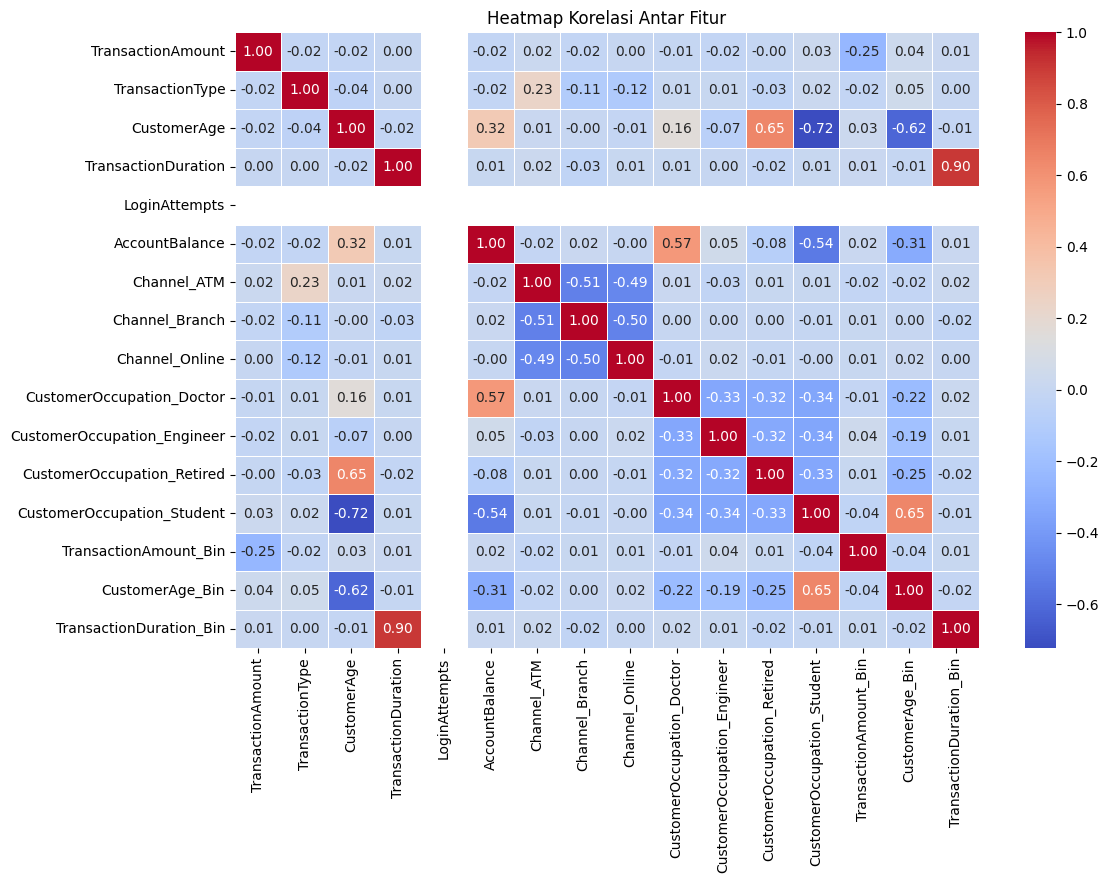

In [75]:
# Cek korelasi antar fitur numerik
corr_matrix = df_cluster.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [76]:
# Hapus fitur dengan variance rendah
selector = VarianceThreshold(threshold=0.01) 
df_var_filtered = selector.fit_transform(df_cluster)

In [77]:
# PCA untuk melihat fitur yang paling berkontribusi
# Ambil 5 komponen utama
pca = PCA(n_components=5)  
df_pca = pca.fit_transform(df_var_filtered)

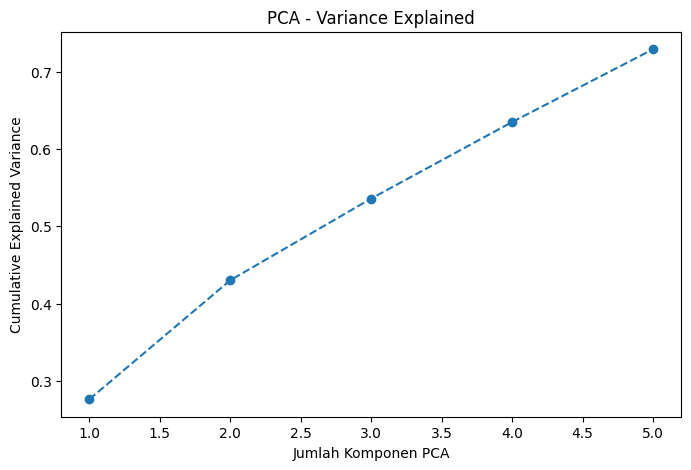

In [78]:
# Plot varians yang dijelaskan oleh masing-masing komponen PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.show()

In [79]:
# Mutual Information untuk mengevaluasi fitur penting
mi_scores = mutual_info_classif(df_var_filtered, cluster_labels, discrete_features=False)
mi_scores_series = pd.Series(mi_scores, index=df_cluster.columns[selector.get_support()])
mi_scores_series.sort_values(ascending=False)

CustomerAge                    0.835686
CustomerAge_Bin                0.738129
CustomerOccupation_Retired     0.526945
CustomerOccupation_Student     0.300202
AccountBalance                 0.267566
CustomerOccupation_Doctor      0.157612
CustomerOccupation_Engineer    0.091609
TransactionType                0.016282
Channel_ATM                    0.013217
TransactionDuration_Bin        0.011821
TransactionAmount              0.000000
Channel_Branch                 0.000000
TransactionDuration            0.000000
Channel_Online                 0.000000
TransactionAmount_Bin          0.000000
dtype: float64

In [80]:
df_selected = df_cluster.copy()

cols_to_drop = [
    "TransactionAmount_Bin", "TransactionAmount", "TransactionDuration", 
    "Channel_Online", "TransactionDuration_Bin", "TransactionType", 
    "Channel_Branch", "Channel_ATM"
]

df_selected.drop(columns=cols_to_drop, inplace=True)
df_selected.drop(columns=["CustomerAge_Bin"], inplace=True)

# Encoding kategori menjadi numerik jika ada yang belum diencode
label_encoders = {}
for col in df_selected.select_dtypes(include=["category", "object"]).columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

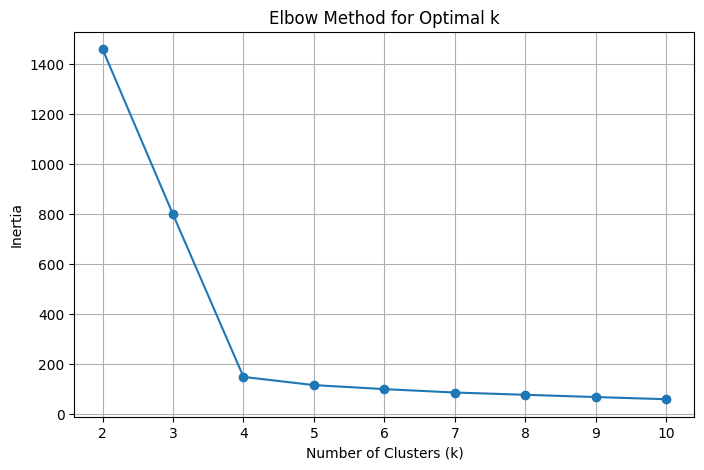

In [81]:
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected)  # Menggunakan dataset hasil feature selection
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [83]:
n_clusters = 5

# Melatih model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_selected)

# Evaluasi clustering dengan silhouette score setelah feature selection
silhouette_avg_new = silhouette_score(df_selected, cluster_labels)
silhouette_avg_new

np.float64(0.7276263584482502)

In [84]:
df_selected["Cluster"] = cluster_labels

**Insight**  
- **Variance Threshold Filtering** membantu menghapus fitur dengan variabilitas rendah, sehingga hanya fitur yang memiliki kontribusi signifikan terhadap segmentasi yang digunakan.  
- **PCA Analysis** menunjukkan bahwa lima komponen utama cukup mewakili variasi dalam data, mengurangi dimensi tanpa kehilangan terlalu banyak informasi penting.  
- **Mutual Information Score** mengidentifikasi fitur dengan pengaruh tertinggi terhadap pembentukan cluster, memungkinkan eliminasi fitur yang kurang relevan seperti beberapa kategori **Channel** dan **Transaction Type**.  
- **Silhouette Score meningkat** setelah feature selection, mencapai **0.7**, yang menunjukkan bahwa cluster yang terbentuk lebih terdefinisi dengan baik dan lebih jelas terpisah dibanding sebelum seleksi fitur. 🚀

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

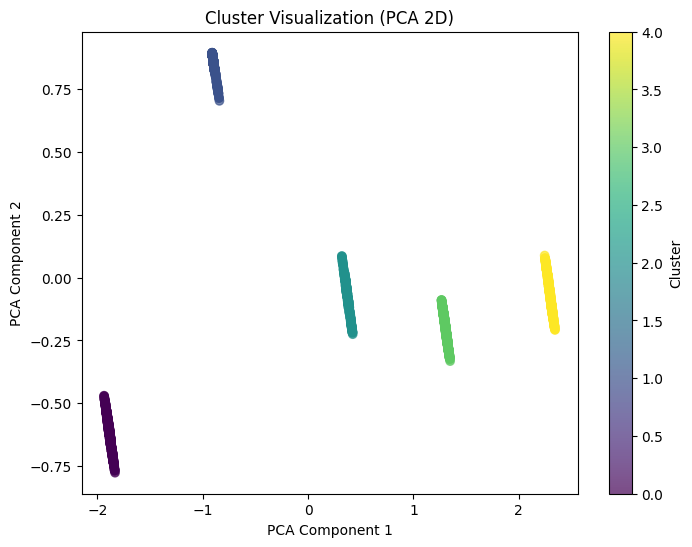

In [85]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (PCA 2D)')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [86]:
min_customer_age = df_original['CustomerAge'].min()
max_customer_age = df_original['CustomerAge'].max()

min_account_balance = df_original['AccountBalance'].min()
max_account_balance = df_original['AccountBalance'].max()

min_login_attempts = df_original['LoginAttempts'].min()
max_login_attempts = df_original['LoginAttempts'].max()

In [87]:
df_inverse = df_selected.copy()

# Inverse transform untuk fitur yang dinormalisasi
df_inverse['CustomerAge'] = df_inverse['CustomerAge'] * (max_customer_age - min_customer_age) + min_customer_age
df_inverse['AccountBalance'] = df_inverse['AccountBalance'] * (max_account_balance - min_account_balance) + min_account_balance
df_inverse['LoginAttempts'] = df_inverse['LoginAttempts'] * (max_login_attempts - min_login_attempts) + min_login_attempts

# Inverse transform untuk fitur kategori jika sebelumnya menggunakan LabelEncoder
df_inverse['CustomerOccupation_Doctor'] = label_encoder.inverse_transform(df_inverse[['CustomerOccupation_Doctor']])
df_inverse['CustomerOccupation_Engineer'] = label_encoder.inverse_transform(df_inverse[['CustomerOccupation_Engineer']])
df_inverse['CustomerOccupation_Retired'] = label_encoder.inverse_transform(df_inverse[['CustomerOccupation_Retired']])
df_inverse['CustomerOccupation_Student'] = label_encoder.inverse_transform(df_inverse[['CustomerOccupation_Student']])

# Tambahkan hasil clustering ke dataset asli atau buat dataframe baru
df_original['Cluster'] = df_inverse['Cluster']

df_original.head()

/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/preprocessing/

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,4
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [88]:
# Pastikan hanya fitur yang distandarisasi yang di-inverse transform
numeric_features = ['CustomerAge', 'LoginAttempts', 'AccountBalance']

# Buat scaler baru dan fit hanya untuk fitur yang digunakan
scaler_selected = MinMaxScaler()
scaler_selected.fit(df_original[numeric_features])  # Fit ulang dengan data asli

# Lakukan inverse transform
df_selected[numeric_features] = scaler_selected.inverse_transform(df_selected[numeric_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [89]:
# Melihat ringkasan statistik tiap cluster
cluster_summary = df_selected.groupby("Cluster").mean()
print(cluster_summary)

         CustomerAge  LoginAttempts  AccountBalance  \
Cluster                                               
0          42.648000            1.0     5486.406064   
1          23.068493            1.0     1570.209985   
2          49.337449            1.0     4697.404897   
3          65.315526            1.0     4542.157012   
4          49.734536            1.0    11660.504794   

         CustomerOccupation_Doctor  CustomerOccupation_Engineer  \
Cluster                                                           
0                              0.0                          1.0   
1                              0.0                          0.0   
2                              1.0                          0.0   
3                              0.0                          0.0   
4                              1.0                          0.0   

         CustomerOccupation_Retired  CustomerOccupation_Student  
Cluster                                                          
0           

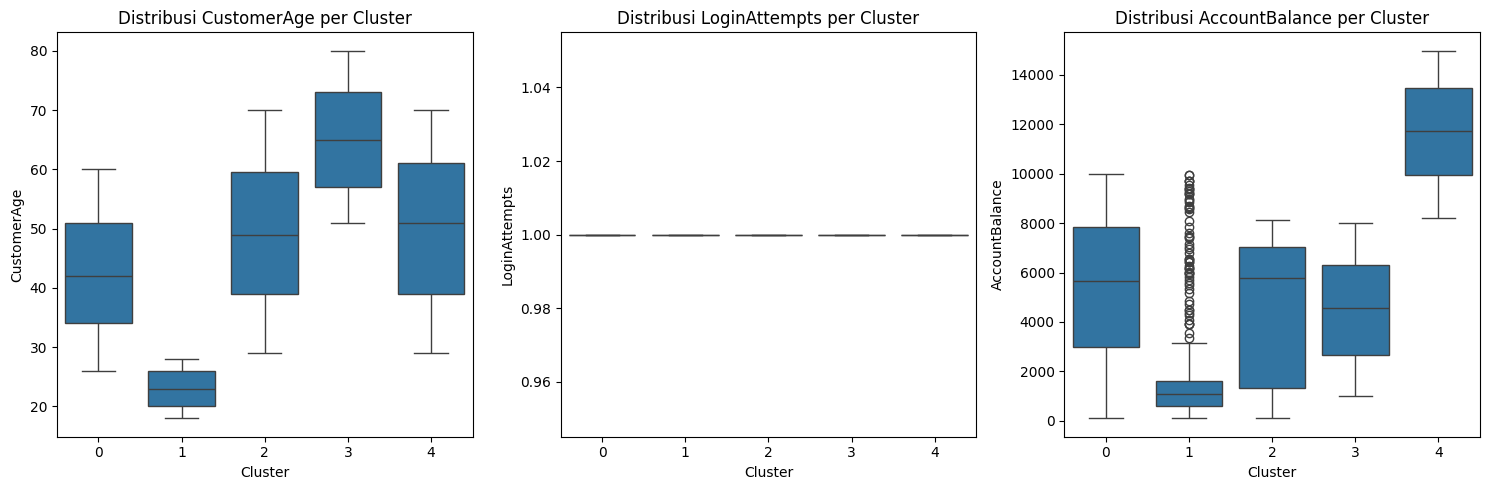

In [90]:
# Fitur numerik yang ingin divisualisasikan
numeric_features = ["CustomerAge", "LoginAttempts", "AccountBalance"]

plt.figure(figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x="Cluster", y=feature, data=df_selected)
    plt.title(f"Distribusi {feature} per Cluster")

plt.tight_layout()
plt.show()

In [92]:
numeric_features = ["CustomerAge", "LoginAttempts", "AccountBalance"]
boxplot_stats = df_selected.groupby("Cluster")[numeric_features].describe()

print(boxplot_stats)

        CustomerAge                                                      \
              count       mean        std   min   25%   50%   75%   max   
Cluster                                                                   
0             625.0  42.648000  10.273859  26.0  34.0  42.0  51.0  60.0   
1             657.0  23.068493   3.134174  18.0  20.0  23.0  26.0  28.0   
2             243.0  49.337449  12.329889  29.0  39.0  49.0  59.5  70.0   
3             599.0  65.315526   8.701033  51.0  57.0  65.0  73.0  80.0   
4             388.0  49.734536  12.536835  29.0  39.0  51.0  61.0  70.0   

        LoginAttempts       ...           AccountBalance                \
                count mean  ...  75%  max          count          mean   
Cluster                     ...                                          
0               625.0  1.0  ...  1.0  1.0          625.0   5486.406064   
1               657.0  1.0  ...  1.0  1.0          657.0   1570.209985   
2               243.0  1.0  .

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Usia Pelanggan:** 42.65 tahun  
- **Rata-rata Saldo Akun:** $5,486.41  
- **Analisis:** Cluster ini mencakup pelanggan usia produktif yang seluruhnya bekerja sebagai **Engineer**. Dengan saldo akun yang relatif tinggi, mereka mencerminkan kelompok profesional mapan dengan stabilitas finansial yang baik serta aktivitas transaksi yang efisien (LoginAttempts = 1).

## Cluster 1:
- **Rata-rata Usia Pelanggan:** 23.07 tahun  
- **Rata-rata Saldo Akun:** $1,570.21  
- **Analisis:** Cluster ini terdiri dari pelanggan paling muda, seluruhnya adalah **mahasiswa (Student)**. Saldo akun mereka paling rendah, menunjukkan mereka masih dalam tahap awal kehidupan finansial dan kemungkinan besar bergantung pada dana terbatas atau orang tua.

## Cluster 2:
- **Rata-rata Usia Pelanggan:** 49.34 tahun  
- **Rata-rata Saldo Akun:** $4,697.40  
- **Analisis:** Cluster ini berisi pelanggan paruh baya, semuanya bekerja sebagai **dokter (Doctor)**. Mereka memiliki saldo akun yang cukup tinggi dan stabil, mencerminkan penghasilan tinggi serta gaya hidup finansial yang tertata rapi.

## Cluster 3:
- **Rata-rata Usia Pelanggan:** 65.32 tahun  
- **Rata-rata Saldo Akun:** $4,542.16  
- **Analisis:** Cluster ini terdiri dari pelanggan yang sudah pensiun (**Retired**). Usia mereka paling tua, dengan saldo akun menengah. Hal ini mencerminkan penggunaan dana pensiun yang efisien untuk menopang kehidupan sehari-hari.

## Cluster 4:
- **Rata-rata Usia Pelanggan:** 49.73 tahun  
- **Rata-rata Saldo Akun:** $11,660.50  
- **Analisis:** Cluster ini merupakan pelanggan paruh baya yang semuanya adalah **dokter (Doctor)**, namun berbeda dengan Cluster 2 karena mereka memiliki **saldo akun tertinggi** di antara seluruh cluster. Hal ini menandakan kestabilan dan kekuatan finansial yang sangat baik, mungkin akibat pengalaman kerja yang lebih lama atau spesialisasi tertentu yang memberikan penghasilan tinggi.

Berikut adalah versi **kesimpulan dan strategi bisnis** yang disesuaikan dengan hasil clustering kamu, tetap mengikuti format dan struktur seperti contoh:

---

## **Kesimpulan**  
Hasil clustering menunjukkan bahwa pelanggan dapat dikelompokkan berdasarkan usia, profesi, dan kondisi finansial mereka:

1. **Cluster 1 (Pelanggan muda)** terdiri dari mahasiswa dengan saldo akun rendah, mencerminkan tahap awal kehidupan finansial.  
2. **Cluster 0 (Engineer)** berisi pelanggan usia produktif dengan saldo menengah dan kestabilan finansial yang baik.  
3. **Cluster 2 dan 4 (Dokter)** mencerminkan kelompok profesional dengan penghasilan tinggi. Cluster 4 memiliki saldo tertinggi, menunjukkan tingkat kemapanan finansial yang sangat tinggi.  
4. **Cluster 3 (Pensiunan)** terdiri dari pelanggan lansia dengan saldo akun yang sedang, menunjukkan manajemen dana pensiun yang cukup stabil.

## **Strategi Bisnis**  
Berdasarkan hasil segmentasi pelanggan, strategi yang dapat diterapkan meliputi:

1. **Pengembangan Produk Keuangan Berdasarkan Segmen Usia dan Profesi**  
   - **Cluster 1 (Mahasiswa)**: Tawarkan akun tabungan pelajar dengan bebas biaya administrasi, fitur pengelolaan keuangan sederhana, dan promosi yang sesuai gaya hidup digital.  
   - **Cluster 0 (Engineer usia produktif)**: Sediakan penawaran kredit rumah atau kendaraan, serta layanan investasi untuk jangka menengah.  
   - **Cluster 2 & 4 (Dokter)**: Berikan akses ke produk premium seperti manajemen kekayaan (wealth management), asuransi investasi, serta layanan finansial pribadi (private banking).  
   - **Cluster 3 (Pensiunan)**: Tawarkan layanan pensiun, deposito bunga tinggi, dan produk investasi risiko rendah.

2. **Pemasaran yang Tepat Sasaran**  
   - Gunakan media sosial dan influencer marketing untuk menjangkau **Cluster 1**, karena mereka lebih aktif di platform digital.  
   - Kirim penawaran eksklusif melalui email atau aplikasi mobile kepada **Cluster 0 dan Cluster 2/4**, sesuai dengan gaya hidup profesional dan mobile-first.  
   - Gunakan telemarketing, SMS banking, atau brosur fisik untuk menjangkau **Cluster 3** yang mungkin lebih nyaman dengan pendekatan tradisional.

3. **Personalisasi Layanan dan Peningkatan Retensi Pelanggan**  
   - Terapkan sistem rekomendasi berbasis AI untuk menyarankan produk yang relevan berdasarkan usia, saldo, dan profesi.  
   - Bangun program loyalitas dengan reward berbasis saldo atau frekuensi transaksi untuk mempertahankan pelanggan bernilai tinggi (terutama **Cluster 2 & 4**).  
   - Tingkatkan kualitas layanan nasabah untuk **Cluster 3**, seperti bantuan langsung dan edukasi keuangan yang mudah diakses.

Strategi-strategi ini dapat meningkatkan engagement, memperluas nilai pelanggan seumur hidup, serta memperkuat posisi kompetitif bisnis melalui pendekatan berbasis data yang lebih presisi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [93]:
selected_columns = [
    'TransactionAmount', 'TransactionType', 
    'CustomerAge', 'CustomerOccupation', 
    'LoginAttempts', 'AccountBalance', 'Cluster'
]

df_selected = df_original[selected_columns]
df_selected.to_csv("Dataset_Clustering.csv", index=False)